https://dacon.io/competitions/official/236075/overview/description

## 모듈 불러오기

In [1]:
import numpy as np
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt

## 데이터 불러오기

In [2]:
train = pd.read_csv('./data/train.csv', index_col='ID')
train.shape

(30200, 13)

In [3]:
train.head()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
ID,,,,,,,,,,,,,
TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [4]:
test = pd.read_csv('./data/test.csv', index_col='ID')
test.shape

(12943, 12)

In [5]:
test.head()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
ID,,,,,,,,,,,,
TEST_00000,110,0,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2
TEST_00001,283,1,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0
TEST_00002,34,1,243.3,205,21.3,225.7,205,29.00,92.6,29,2.44,2
TEST_00003,209,86,83.0,93,24.1,270.6,220,22.89,266.9,81,2.80,6
TEST_00004,202,0,293.2,23,31.0,294.0,24,26.39,223.8,33,6.66,2


## 데이터 탐색

In [6]:
train.isnull().sum().sum()

0

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30200 entries, TRAIN_00000 to TRAIN_30199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입일      30200 non-null  int64  
 1   음성사서함이용  30200 non-null  int64  
 2   주간통화시간   30200 non-null  float64
 3   주간통화횟수   30200 non-null  int64  
 4   주간통화요금   30200 non-null  float64
 5   저녁통화시간   30200 non-null  float64
 6   저녁통화횟수   30200 non-null  int64  
 7   저녁통화요금   30200 non-null  float64
 8   밤통화시간    30200 non-null  float64
 9   밤통화횟수    30200 non-null  int64  
 10  밤통화요금    30200 non-null  float64
 11  상담전화건수   30200 non-null  int64  
 12  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 3.2+ MB


- 모든 변수가 수치형 범수인 것을 확인

In [8]:
train.nunique()

가입일         345
음성사서함이용      76
주간통화시간     2771
주간통화횟수      239
주간통화요금      735
저녁통화시간     2606
저녁통화횟수      241
저녁통화요금     1840
밤통화시간      2545
밤통화횟수       233
밤통화요금      1216
상담전화건수       11
전화해지여부        2
dtype: int64

- 값을 확인해 보니, 전화해지여부(label)를 제외한 다른 값들이 범주형에 속하지 않음.

In [9]:
train.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


- 4분위수를 보았을 때, 가입일, 음성사서함이용, 상담전화건수의 데이터는 한쪽에 치우쳐져 있을 것으로 보임.

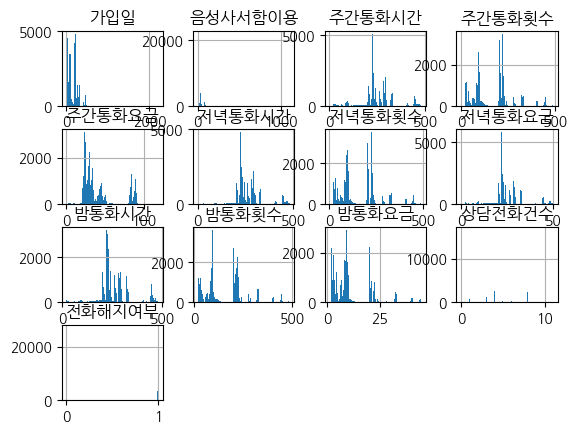

In [10]:
train.hist(bins=100);

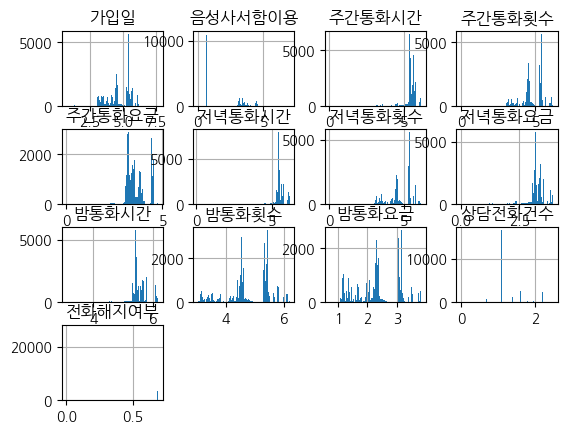

In [11]:
np.log1p(train).hist(bins=100);

- 주간통화시간, 저녁통화시간, 밤통화시간 은 대체적으로 비슷한 양상을 보인다. 왜?<br><br>
- 주간통화횟수, 저녁통화횟수, 밤통화횟수 는 대체적으로 비슷한 양상을 보인다. 왜?<br><br>
- 하지만 요금은 다 다르다? 주간 > 저녁 > 밤 순으로 비싸다.<br><br>
- 모종의 멤버쉽이 있지 않을까? => 군집 분석 진행

In [12]:
train['전화해지여부'].value_counts()

0    26882
1     3318
Name: 전화해지여부, dtype: int64

In [13]:
train['전화해지여부'].value_counts(1)

0    0.890132
1    0.109868
Name: 전화해지여부, dtype: float64

In [14]:
train['상담전화건수'].value_counts().sort_index()

0      6303
1       834
2     16522
3      1180
4      2540
5       234
6       203
7        13
8      2334
9        18
11       19
Name: 상담전화건수, dtype: int64

In [15]:
train['상담전화건수'].value_counts(1).sort_index()

0     0.208709
1     0.027616
2     0.547086
3     0.039073
4     0.084106
5     0.007748
6     0.006722
7     0.000430
8     0.077285
9     0.000596
11    0.000629
Name: 상담전화건수, dtype: float64

In [16]:
train['밤통화요금'].max()

44.98

In [17]:
train[train['밤통화요금'] == 44.98]

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
ID,,,,,,,,,,,,,
TRAIN_13200,444,1,470.4,449,49.1,450.0,100,40.88,468.5,409,44.98,4,0
TRAIN_28377,444,50,449.6,448,45.9,462.0,405,48.64,468.3,68,44.98,4,0


In [18]:
train['주간통화요금'].max()

118.6

In [19]:
train[train['주간통화요금'] == 118.6]

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
ID,,,,,,,,,,,,,
TRAIN_14373,100,1,223.2,223,118.6,226.9,119,20.92,227.5,120,20.22,11,0


In [20]:
train['저녁통화요금'].max()

49.98

In [21]:
train[train['저녁통화요금'] == 49.98]

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
ID,,,,,,,,,,,,,
TRAIN_00441,444,1,479.1,405,51.6,455.5,441,49.98,460.6,449,40.79,5,0
TRAIN_11764,459,41,446.2,405,56.9,456.4,454,49.98,466.7,454,7.55,0,0
TRAIN_20956,406,58,446.8,405,59.8,457.0,99,49.98,441.5,90,6.50,4,0


## 파생 변수 생성

In [22]:
train['통화시간'] = train['주간통화시간'] + train['저녁통화시간'] + train['밤통화시간']
train['통화횟수'] = train['주간통화횟수'] + train['저녁통화횟수'] + train['밤통화횟수']
train['통화요금'] = train['주간통화요금'] + train['저녁통화요금'] + train['밤통화요금']

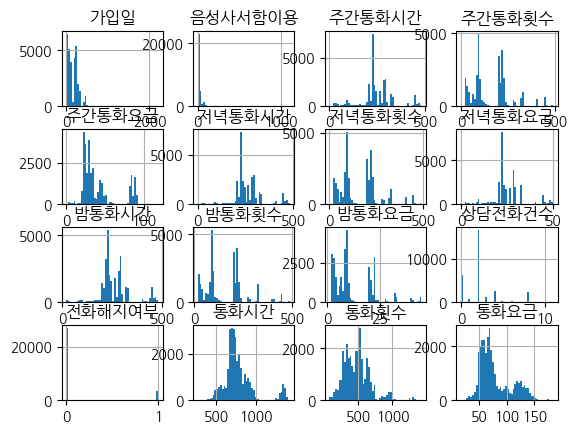

In [23]:
train.hist(bins=50);

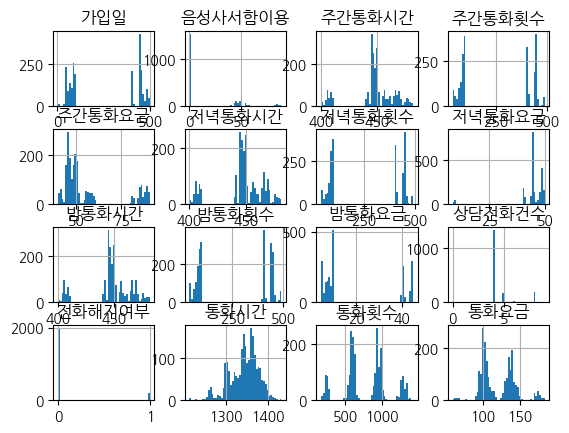

In [24]:
train_t1100_over = train.loc[train['통화시간'] > 1100]
train_t1100_over.hist(bins=50);

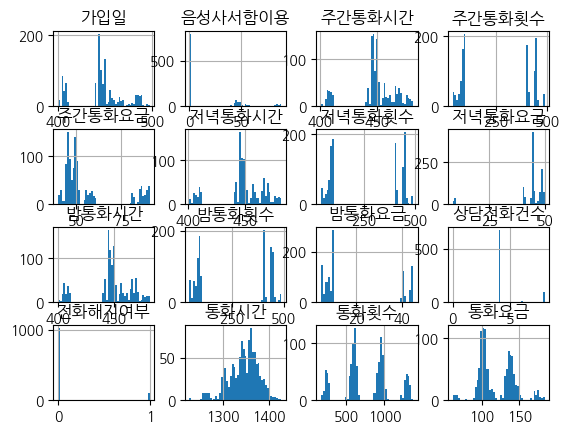

In [25]:
train_t1100_over_j250_over = train_t1100_over.loc[(train_t1100_over['통화시간'] > 1100) & (train_t1100_over['가입일'] > 250)]
train_t1100_over_j250_over.hist(bins=50);

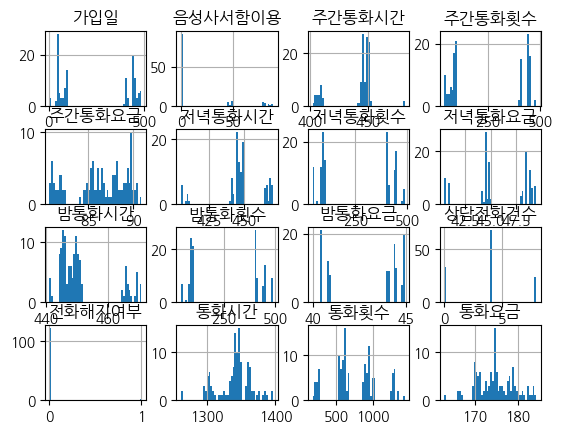

In [26]:
train_t1100_over_b160_over = train_t1100_over.loc[(train_t1100_over['통화시간'] > 1100) & (train_t1100_over['통화요금'] > 160)]
train_t1100_over_b160_over.hist(bins=50);

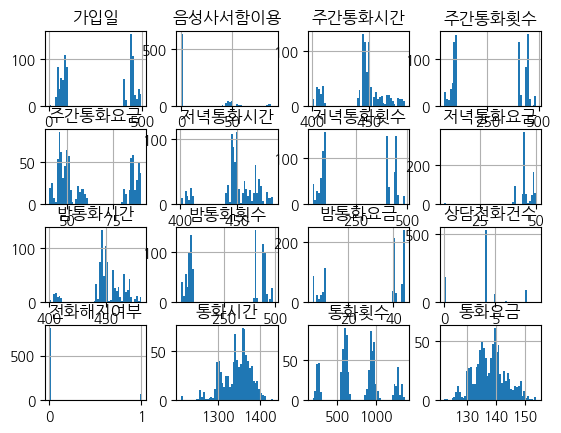

In [27]:
train_t1100_over_b160_b120 = train_t1100_over.loc[(train_t1100_over['통화시간'] > 1100) & (train_t1100_over['통화요금'] <= 160) & (train_t1100_over['통화요금'] > 120)]
train_t1100_over_b160_b120.hist(bins=50);

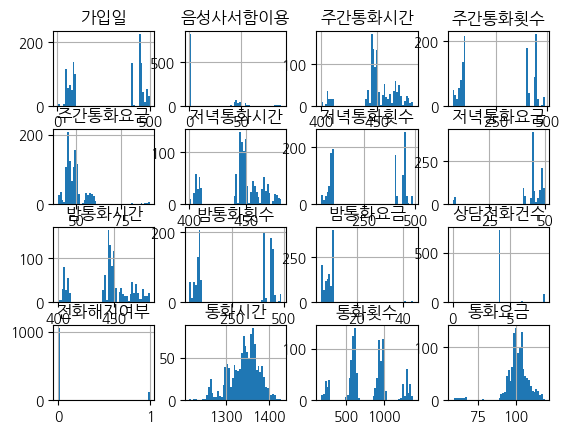

In [28]:
train_t1100_over_b120_under = train_t1100_over.loc[(train_t1100_over['통화시간'] > 1100) & (train_t1100_over['통화요금'] <= 120)]
train_t1100_over_b120_under.hist(bins=50);

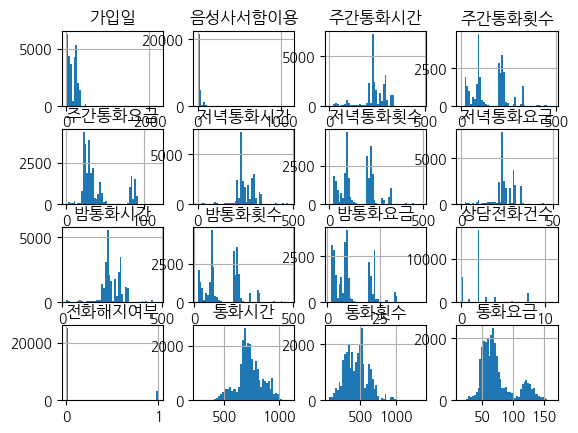

In [29]:
train_t1100_under = train.loc[train['통화시간'] <= 1100].copy()
train_t1100_under.hist(bins=50);

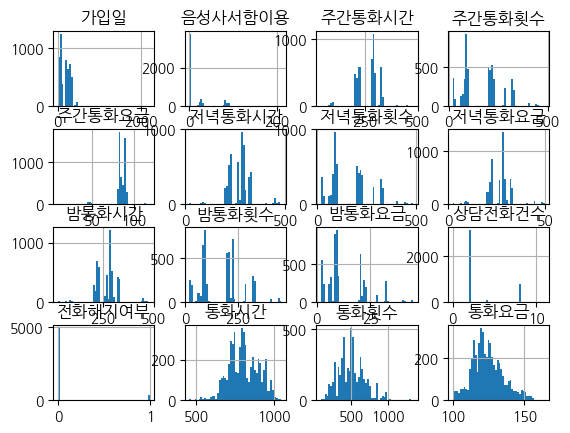

In [30]:
train_t1100_under_b100_over = train_t1100_under.loc[(train_t1100_under['통화시간'] <= 1100) & (train_t1100_under['통화요금'] > 100)].copy()
train_t1100_under_b100_over.hist(bins=50);

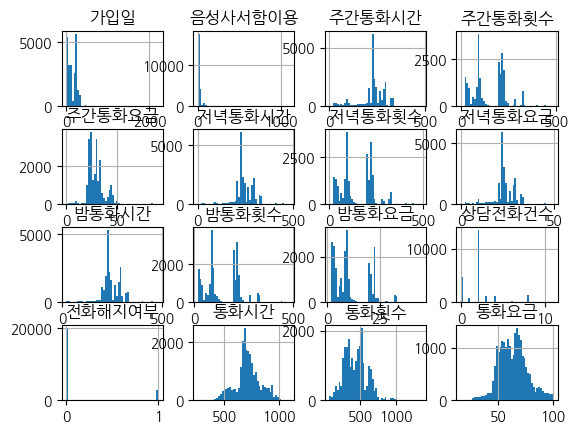

In [31]:
train_t1100_under_b100_under = train_t1100_under.loc[(train_t1100_under['통화시간'] <= 1100) & (train_t1100_under['통화요금'] <= 100)].copy()
train_t1100_under_b100_under.hist(bins=50);

In [32]:
train_t1100_over_b160_over['전화해지여부'].value_counts(1)

0    0.976
1    0.024
Name: 전화해지여부, dtype: float64

In [33]:
train_t1100_over_b160_b120['전화해지여부'].value_counts(1)

0    0.925373
1    0.074627
Name: 전화해지여부, dtype: float64

In [34]:
train_t1100_over_b120_under['전화해지여부'].value_counts(1)

0    0.891156
1    0.108844
Name: 전화해지여부, dtype: float64

In [35]:
train_t1100_under_b100_over['전화해지여부'].value_counts(1)

0    0.931887
1    0.068113
Name: 전화해지여부, dtype: float64

In [36]:
train_t1100_under_b100_under['전화해지여부'].value_counts(1)

0    0.878623
1    0.121377
Name: 전화해지여부, dtype: float64

In [37]:
train_t1100_over_b160_over.shape

(125, 16)

In [38]:
train_t1100_over_b160_b120.shape

(871, 16)

In [39]:
train_t1100_over_b120_under.shape

(1176, 16)

In [40]:
train_t1100_under_b100_over.shape

(5256, 16)

In [41]:
train_t1100_under_b100_under.shape

(22772, 16)

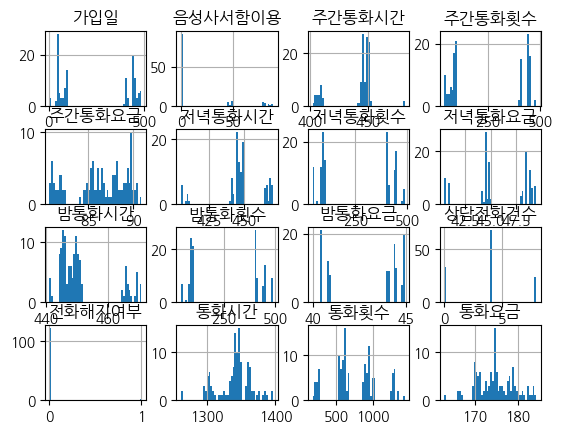

In [42]:
train_t1100_over_b160_over.hist(bins=50);

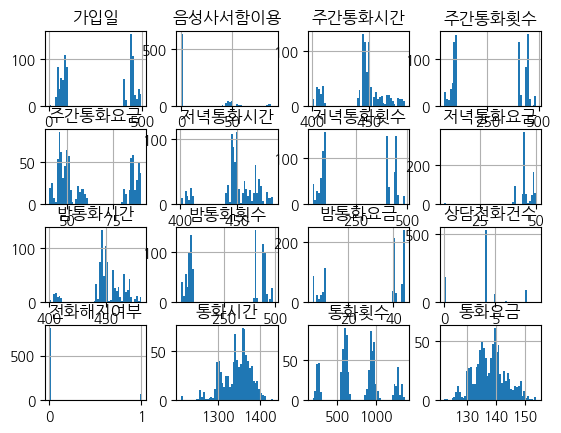

In [43]:
train_t1100_over_b160_b120.hist(bins=50);

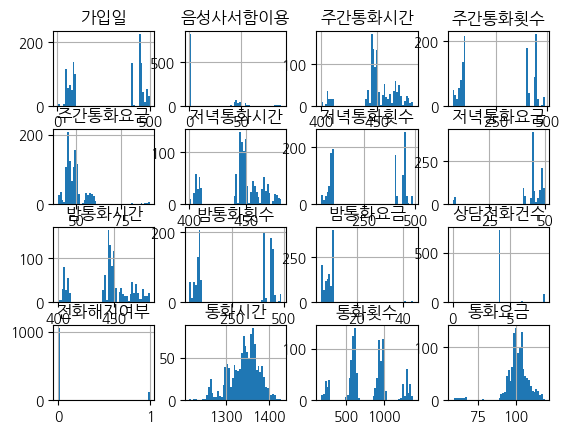

In [44]:
train_t1100_over_b120_under.hist(bins=50);

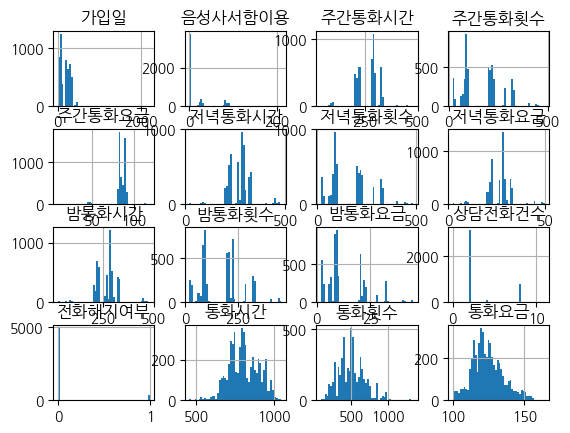

In [45]:
train_t1100_under_b100_over.hist(bins=50);

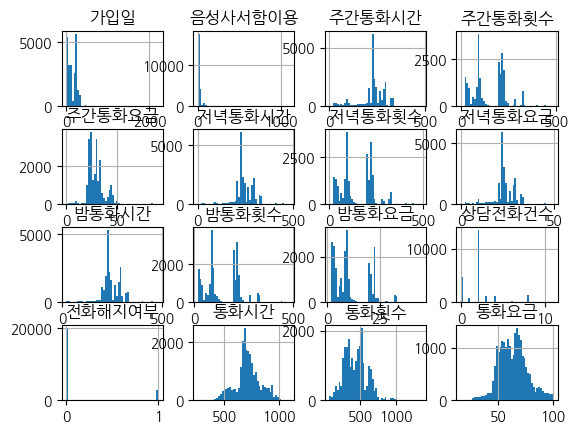

In [46]:
train_t1100_under_b100_under.hist(bins=50);